<div style="text-align: center;">
    <h1>Retail Store Shelf Availability Detection</h1>
</div>

<div style="text-align: center;">
    <h1>Using YOLO v8</h1>
</div>

In [1]:
pip install ultralytics

In [2]:
from ultralytics import YOLO

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Training with YOLO v8

In [4]:
#Training YOLOv8 on a custom dataset
!yolo task = detect mode = train model = yolov8n.pt data = /content/drive/MyDrive/shelf_availability/data.yaml epochs = 80 imgsz= 608 project = /content/drive/MyDrive/epoch80 plots= True

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/shelf_availability/data.yaml, epochs=80, patience=50, batch=16, imgsz=608, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/epoch80, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=t

## Predicting using Test set

In [5]:
# Predicting using our custom trained YOLOv8 model
!yolo task = detect mode = predict model = /content/drive/MyDrive/epoch80/train2/weights/best.pt source = /content/drive/MyDrive/shelf_availability/test/images  project = /content/drive/MyDrive/epoch80

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients

image 1/30 /content/drive/MyDrive/shelf_availability/test/images/db101_jpg.rf.dd83046da372979e3bc1162aa03e2ab4.jpg: 608x608 1 space_a, 6 space_nas, 7.3ms
image 2/30 /content/drive/MyDrive/shelf_availability/test/images/db104_jpg.rf.49a4892d0cc751d7c3f4359b01a3ae3d.jpg: 608x608 8 space_as, 15 space_nas, 7.3ms
image 3/30 /content/drive/MyDrive/shelf_availability/test/images/db11_jpg.rf.39ed61ce43ab832e53db2a10bca3da46.jpg: 608x608 7 space_as, 8 space_nas, 7.3ms
image 4/30 /content/drive/MyDrive/shelf_availability/test/images/db125_jpg.rf.e1bb442a6d164714b3e4e7f96965fd83.jpg: 608x608 4 space_as, 4 space_nas, 7.3ms
image 5/30 /content/drive/MyDrive/shelf_availability/test/images/db128_jpg.rf.dfed7ac2560a444ef5db6b5042681ce5.jpg: 608x608 2 space_as, 3 space_nas, 7.6ms
image 6/30 /content/drive/MyDrive/shelf_availability/test/images/db13_

## Displaying the results

**Labels**<br>

**space_a** - _Space Available_<br>
**space_na** - _Space Not Available_

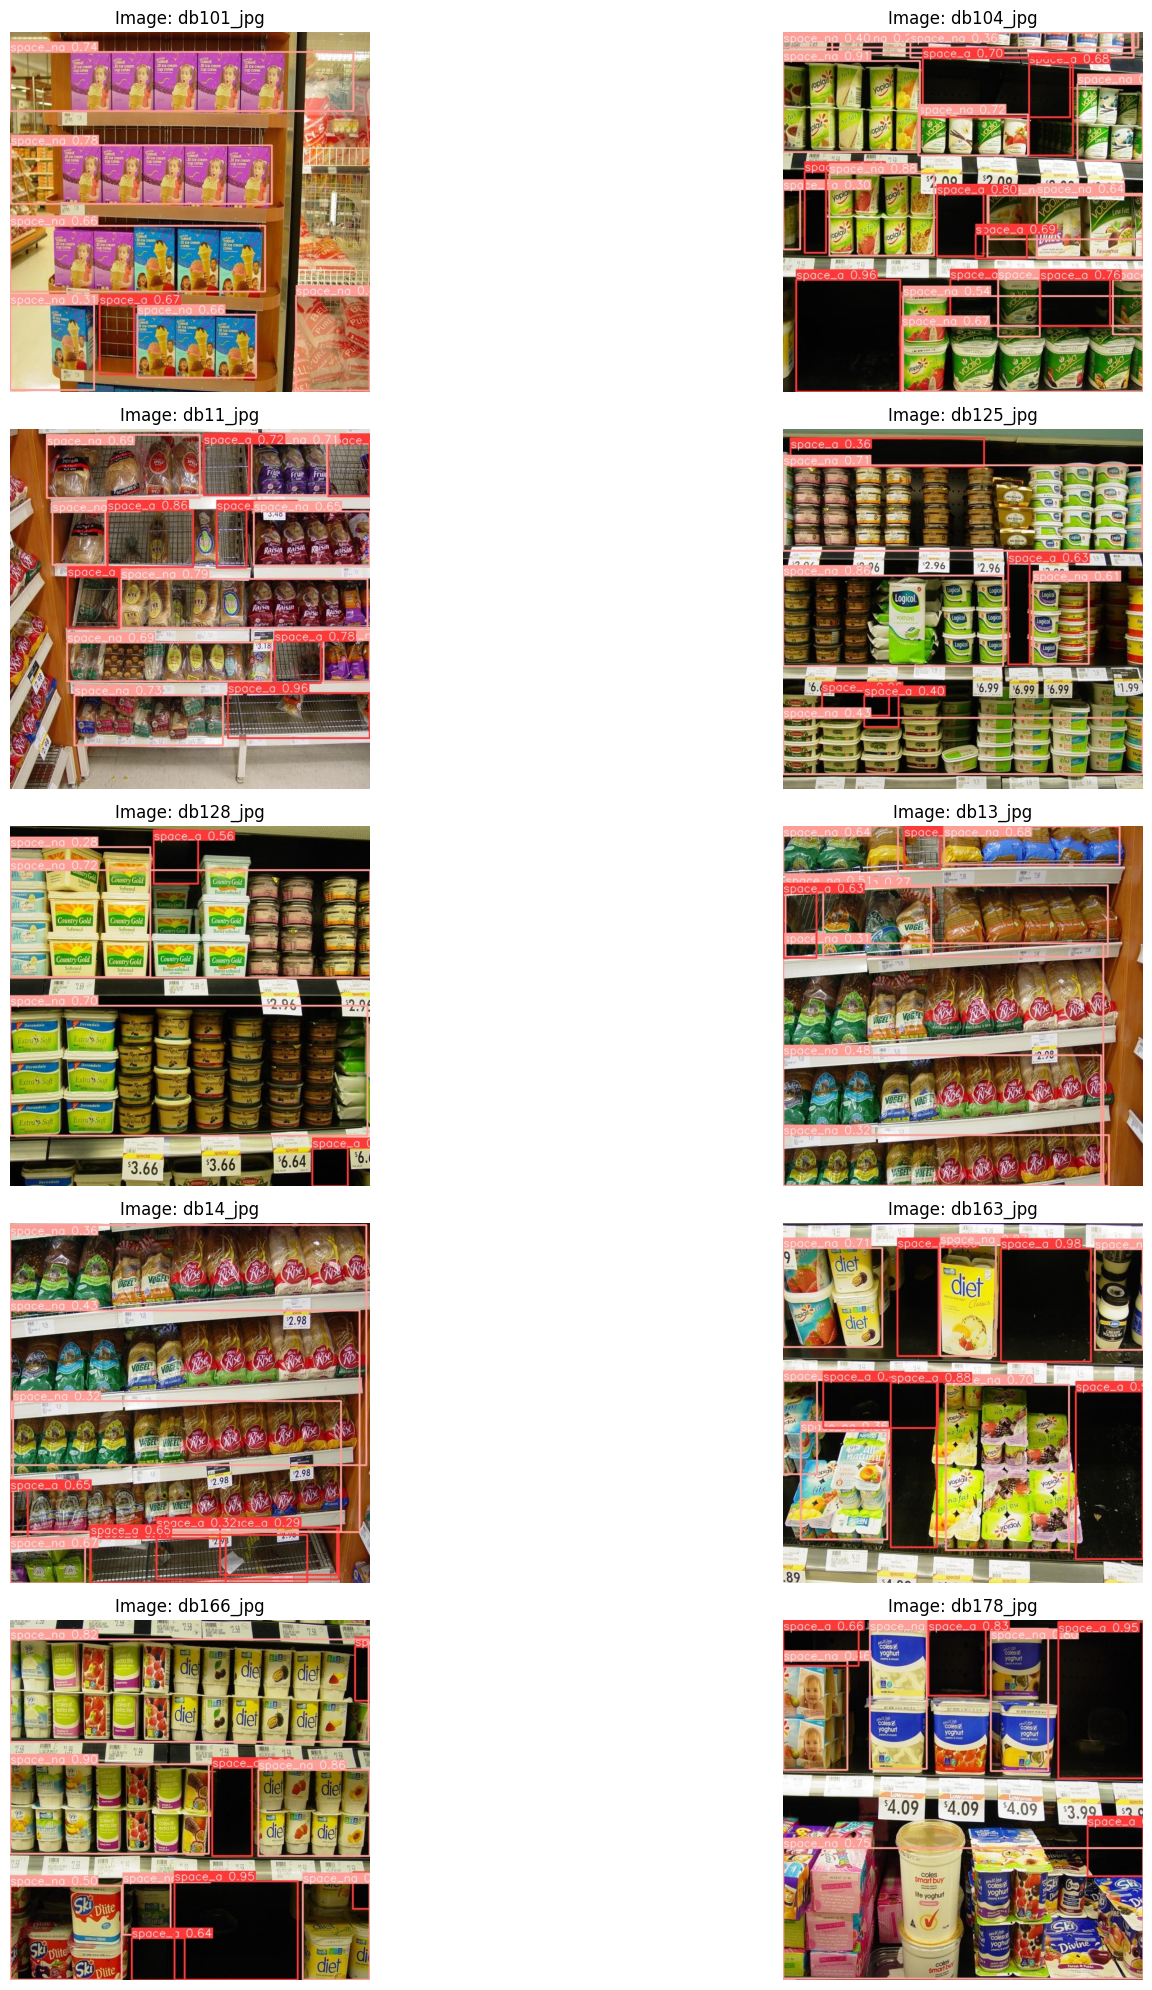

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

# Specify the folder containing the images
folder_path = '/content/drive/MyDrive/epoch80/predict'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg'))]

# Define the grid size (rows, columns) for displaying images
rows, cols = 5, 2

# Calculate the total number of grid positions
total_grid_positions = rows * cols

# Create a new figure for displaying the images
plt.figure(figsize=(20,20))  # Increase the figure size here

# Limit the number of images to display based on grid size and maximum (12)
num_images_to_display = min(len(image_files), total_grid_positions, 12)

# Loop through each image file and display it using OpenCV and Matplotlib
for i in range(num_images_to_display):
    image_file = image_files[i]
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)

    if image is not None:
        # Convert the image from BGR to RGB for proper display using Matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Add the image to the grid
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image_rgb)
        plt.title(f"Image: {image_file.split('.')[0]}")
        plt.axis('off')
    else:
        print(f"Error reading image: {image_path}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()

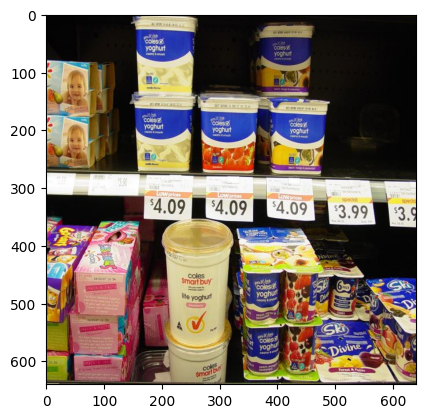

In [7]:
# input image
original_image = cv2.imread('/content/drive/MyDrive/shelf_availability/test/images/db178_jpg.rf.6da6a4b8cad4eb848273e1c7e60c3336.jpg')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

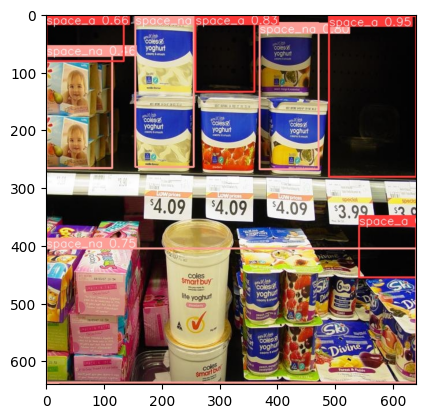

In [8]:
# Plotting the predicted image along with confidence
predicted_image = cv2.imread('/content/drive/MyDrive/epoch80/predict/db178_jpg.rf.6da6a4b8cad4eb848273e1c7e60c3336.jpg')
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))

## Finding percentage of available space

In [9]:
from PIL import Image

# Path to the image you want to read
image_path = "/content/drive/MyDrive/detection_img/db280.jpg"

# Open the image using PIL
image_pil = Image.open(image_path)
model = YOLO("/content/drive/MyDrive/epoch80/train2/weights/best.pt")

In [10]:
detections = model.predict(image_pil)


0: 480x608 3 space_as, 7 space_nas, 79.3ms
Speed: 5.6ms preprocess, 79.3ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 608)


In [11]:
    for r in detections:
        for c in r.boxes.cls:
            print(model.names[int(c)])

space_na
space_a
space_na
space_a
space_na
space_a
space_na
space_na
space_na
space_na


In [12]:
for d in detections:
  boxes = r.boxes
  for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
    c = box.cls
    print(b)
    print(model.names[int(c)])

tensor([ 860.6444,  535.8936, 1147.9534, 1047.8955], device='cuda:0')
space_na
tensor([ 406.6910,  522.1199,  827.7501, 1012.4802], device='cuda:0')
space_a
tensor([1305.9536,  719.8759, 1982.9460, 1027.0293], device='cuda:0')
space_na
tensor([1091.9612,    5.9413, 1306.7922,  353.5279], device='cuda:0')
space_a
tensor([1348.2373,  131.5490, 2033.2412,  379.1168], device='cuda:0')
space_na
tensor([1168.3497,  702.8923, 1277.8104, 1034.4427], device='cuda:0')
space_a
tensor([  10.3840, 1263.9502, 1924.1221, 1688.2261], device='cuda:0')
space_na
tensor([ 247.6807,  135.0703, 1061.9026,  358.7441], device='cuda:0')
space_na
tensor([2.8510e-04, 7.1226e+02, 2.3738e+02, 1.0130e+03], device='cuda:0')
space_na
tensor([   0.0000,  117.3729, 1060.0342,  361.9992], device='cuda:0')
space_na


In [13]:
# Create dictionaries to store the total areas for each label
total_area_space_na = 0
total_area_space_a = 0

for d in detections:
    boxes = d.boxes
    for box in boxes:
        b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
        c = int(box.cls)

        # Calculate the area of the bounding box
        box_area = (b[2] - b[0]) * (b[3] - b[1])

        # Add the area to the corresponding label's total area
        if model.names[c] == "space_na":
            total_area_space_na += box_area
        elif model.names[c] == "space_a":
            total_area_space_a += box_area

total_area_space_na = total_area_space_na.item()
total_area_space_a = total_area_space_a.item()

# Print the total areas covered by each label
print("Total Area Covered by space_na:", total_area_space_na)
print("Total Area Covered by space_a:", total_area_space_a)

Total Area Covered by space_na: 1849402.375
Total Area Covered by space_a: 317434.84375


In [14]:
total_area = total_area_space_na + total_area_space_a
space_available = (total_area_space_a/total_area)*100
print("Percentage of available space = ",round(space_available,2),"%")

Percentage of available space =  14.65 %


In [15]:
total_area = total_area_space_na + total_area_space_a
space_available = (total_area_space_na/total_area)*100
print("Percentage of filled space = ",round(space_available,2),"%")

Percentage of filled space =  85.35 %


## Model Evaluation

**Evaluation metrics**
- Precision (P): The ratio of true positive predictions to the total number of predicted instances. It measures how accurate the positive predictions are.

- Recall (R): The ratio of true positive predictions to the total number of actual instances. It measures how well the model is able to find all instances of the class.

- mAP50: The mean average precision at an IoU threshold of 0.50. It considers how well the model ranks the correct bounding boxes in relation to others.

- mAP50-95: The mean average precision at IoU thresholds ranging from 0.50 to 0.95. It provides a more comprehensive evaluation across different IoU levels.

We used 210 images for training, 60 images for validation and 30 for testing.

**Model Summary using the validation set**

- The model has 168 layers and 3006038 parameters.
- The model has been trained on 60 images and has detected 492 instances.
- The model has an average precision (AP) of 0.75, a recall of 0.76, and an mAP@50 of 0.804.
- The model has an mAP at an IoU threshold ranging from 0.50 to 0.95 of 0.522.
- The model has an AP of 0.737 for space_a(Space Availabe) instances, a recall of 0.767, and an mAP@50 of 0.808.
- The model has an AP of 0.762 for space_na(Space Not Available) instances, a recall of 0.753, and an mAP@50 of 0.8.

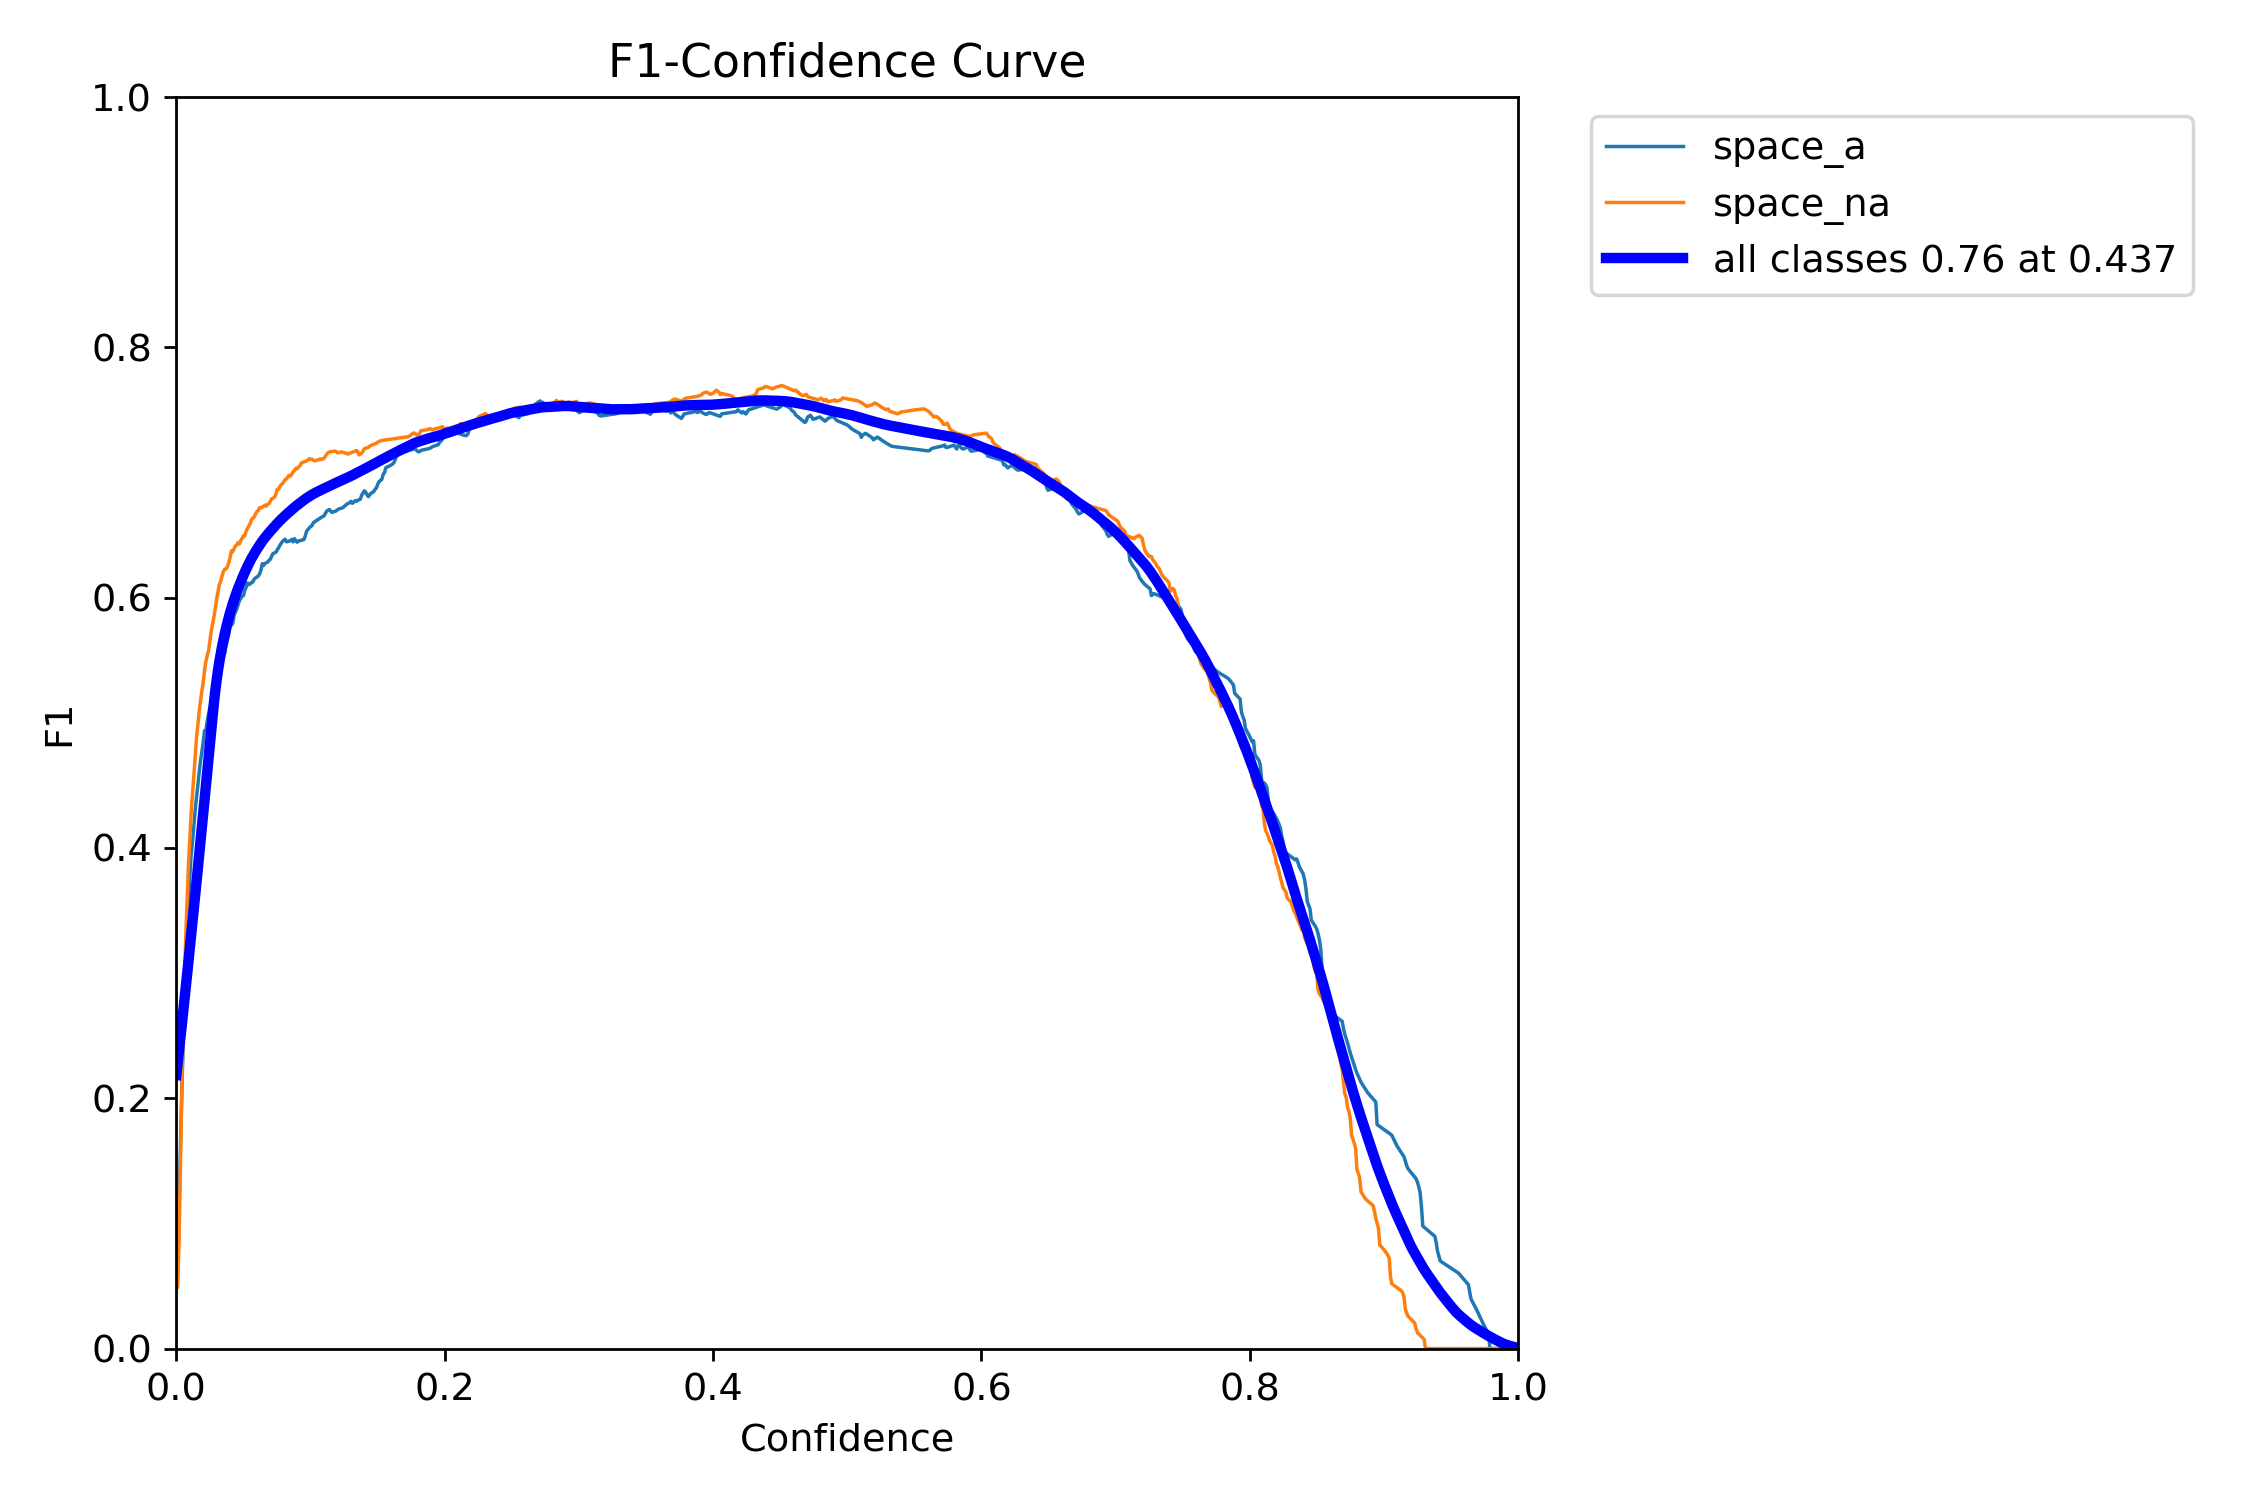

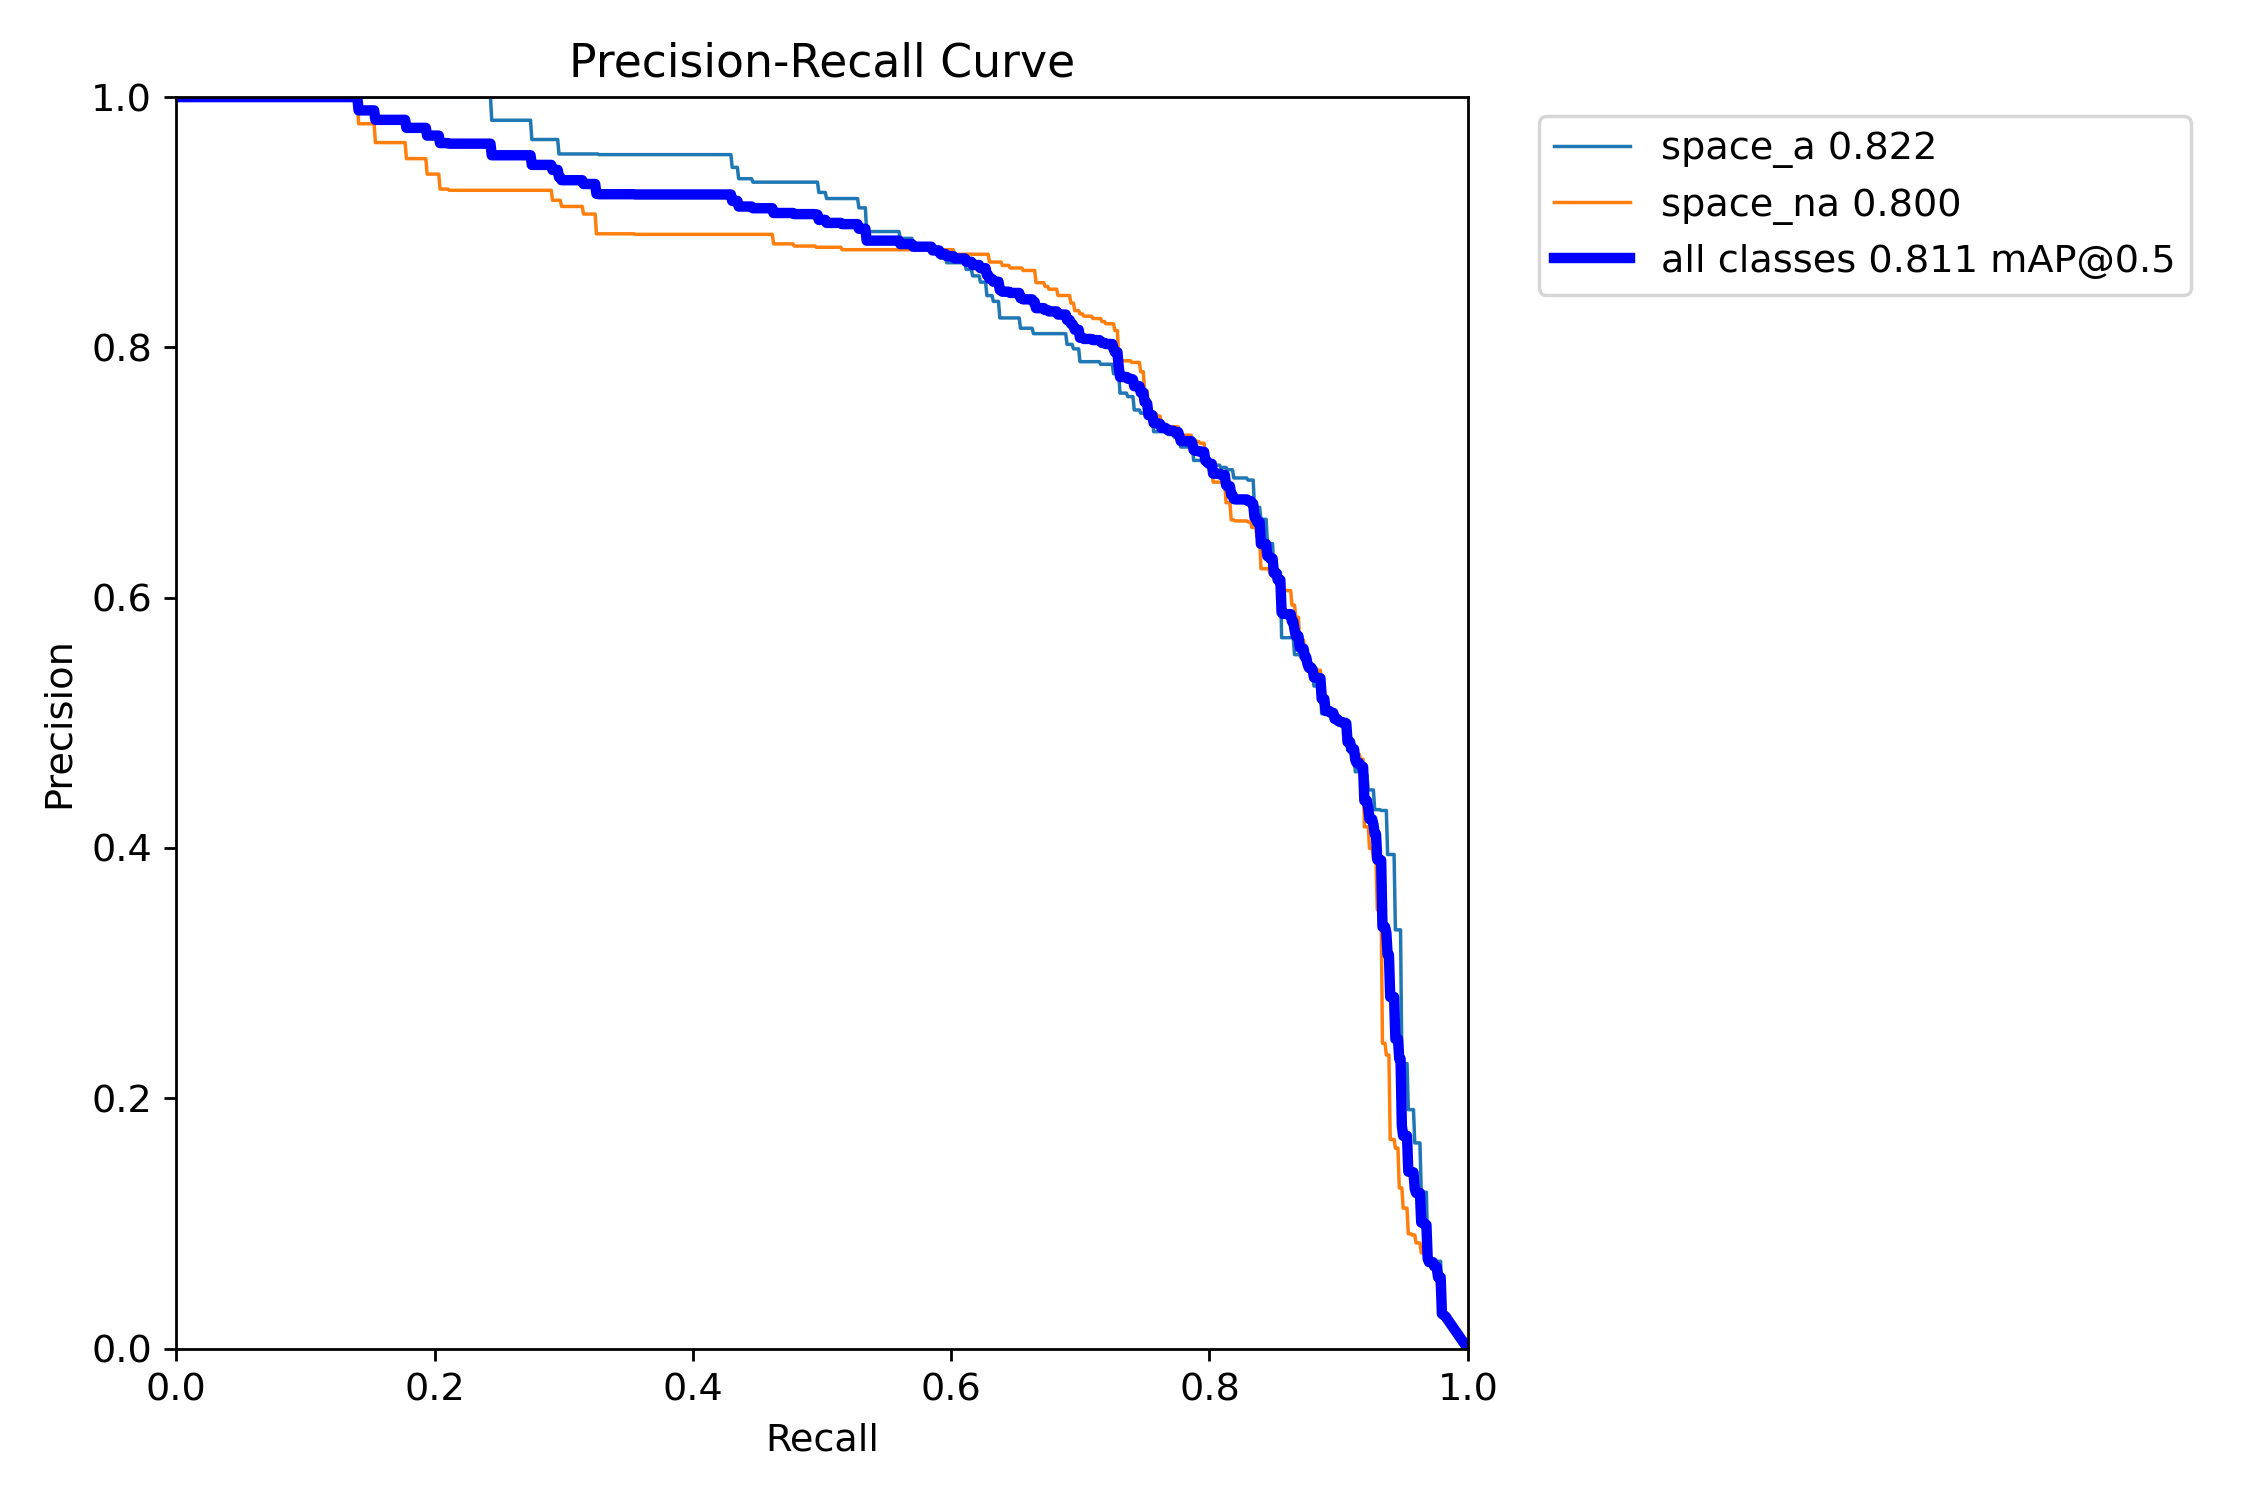

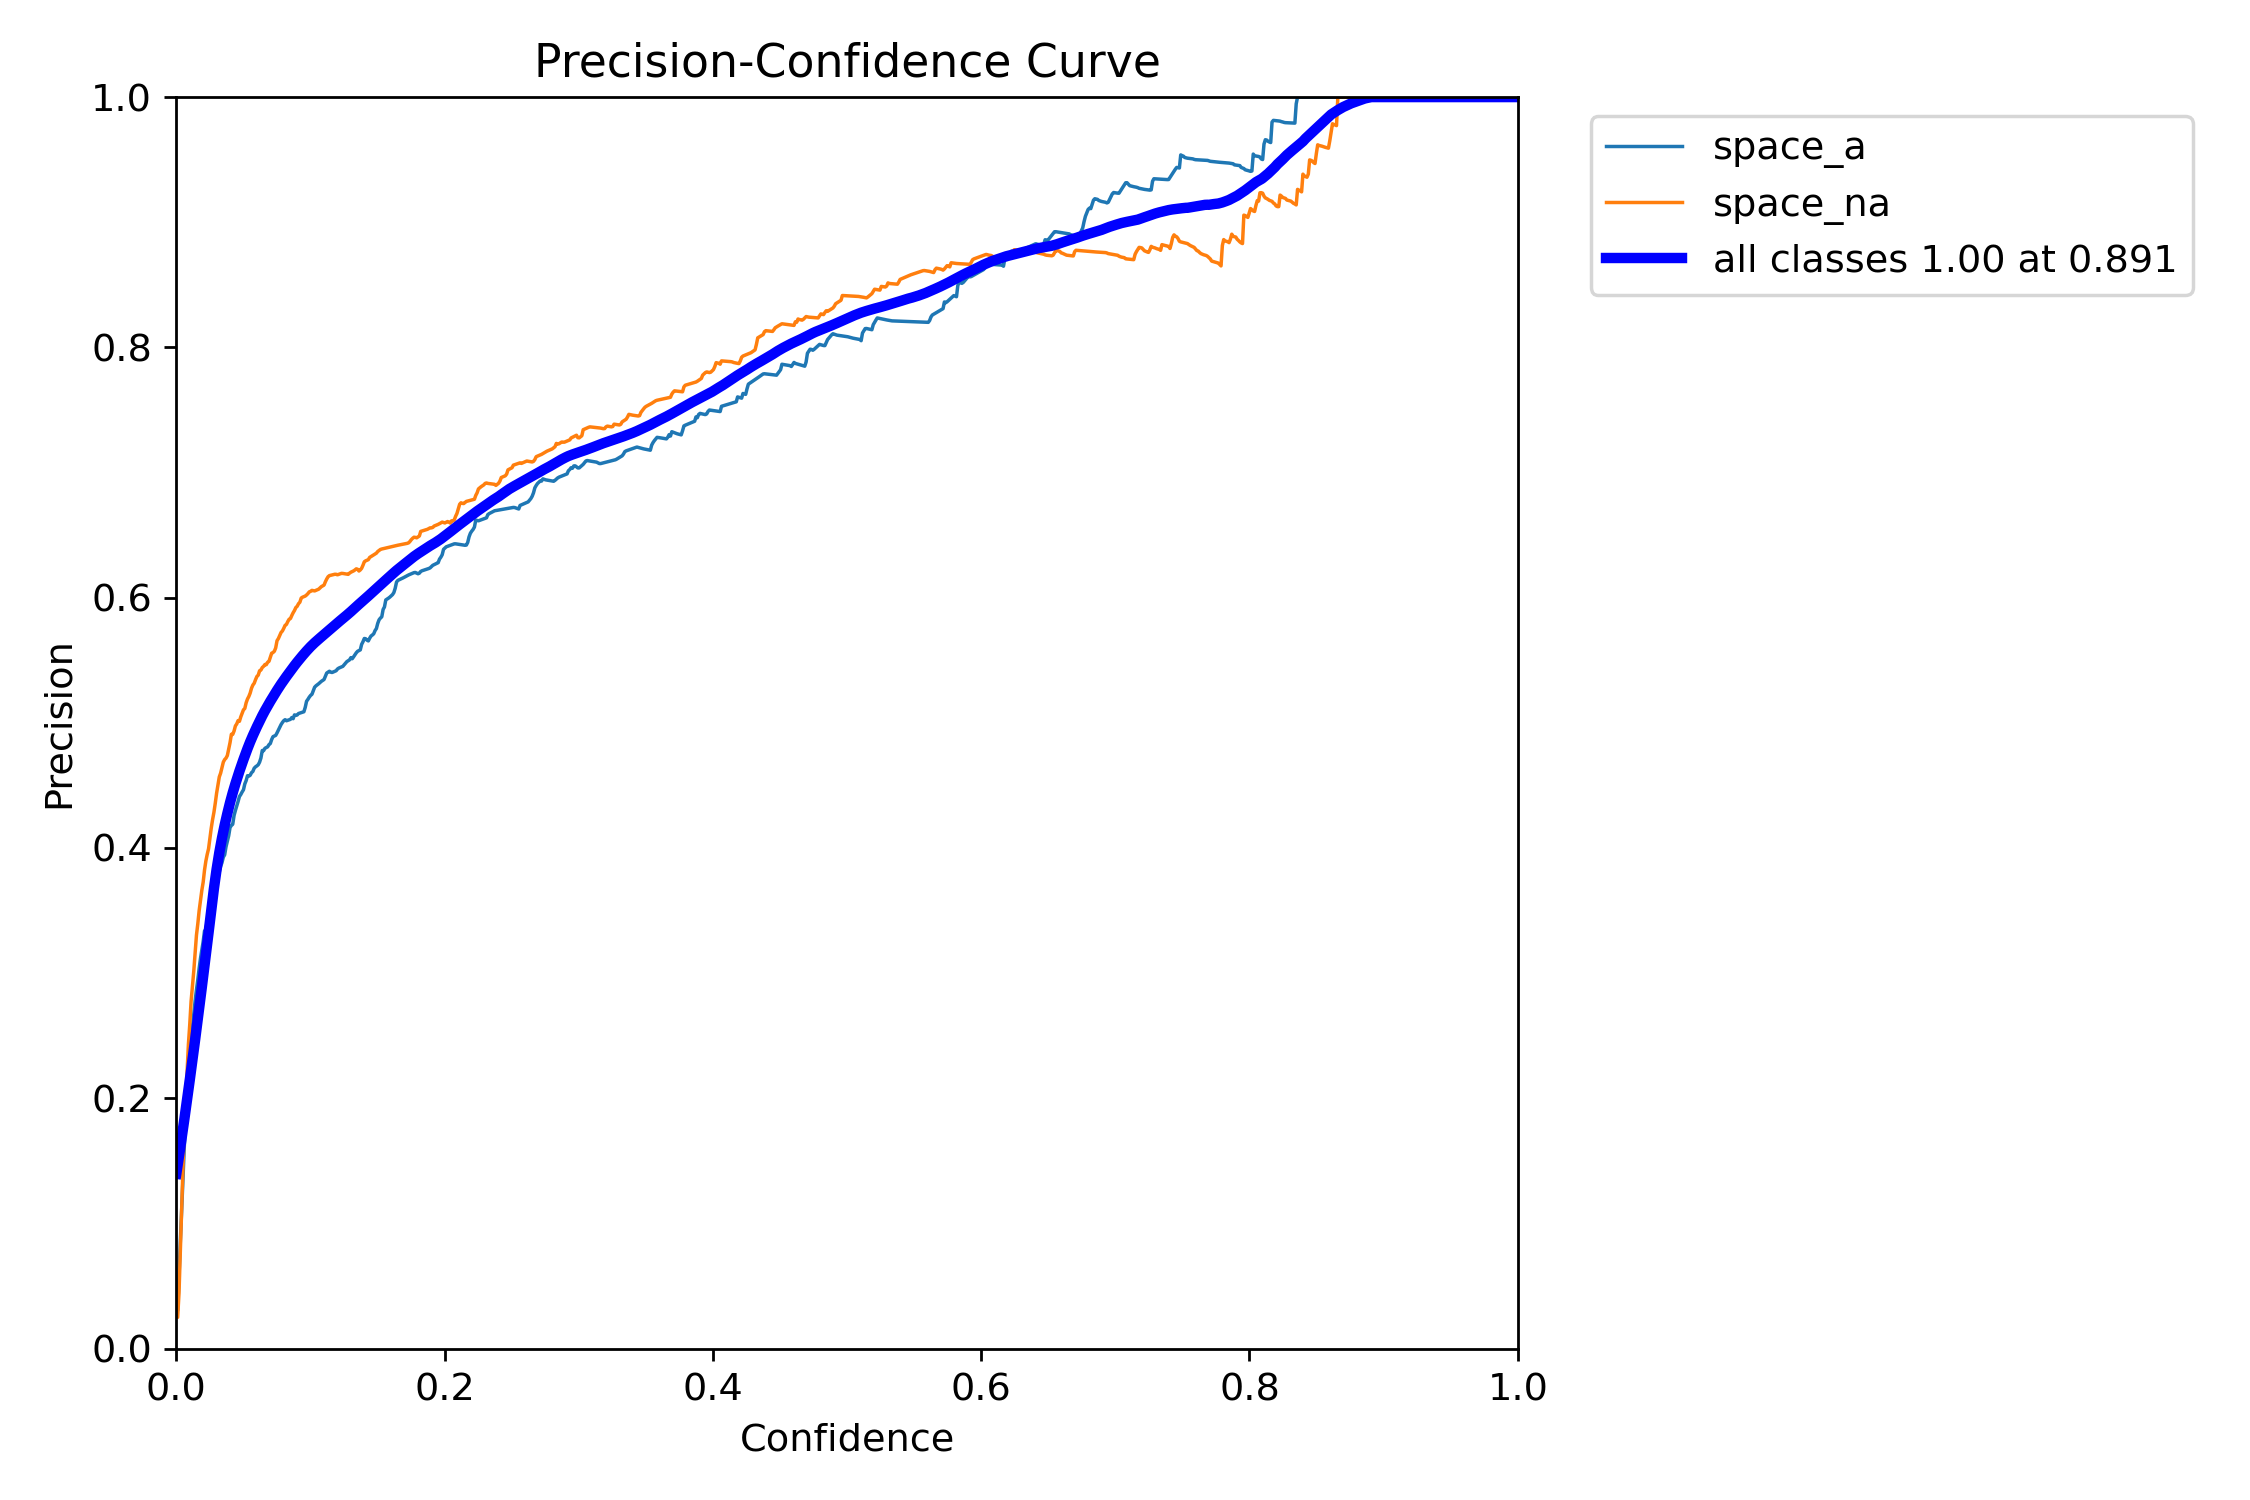

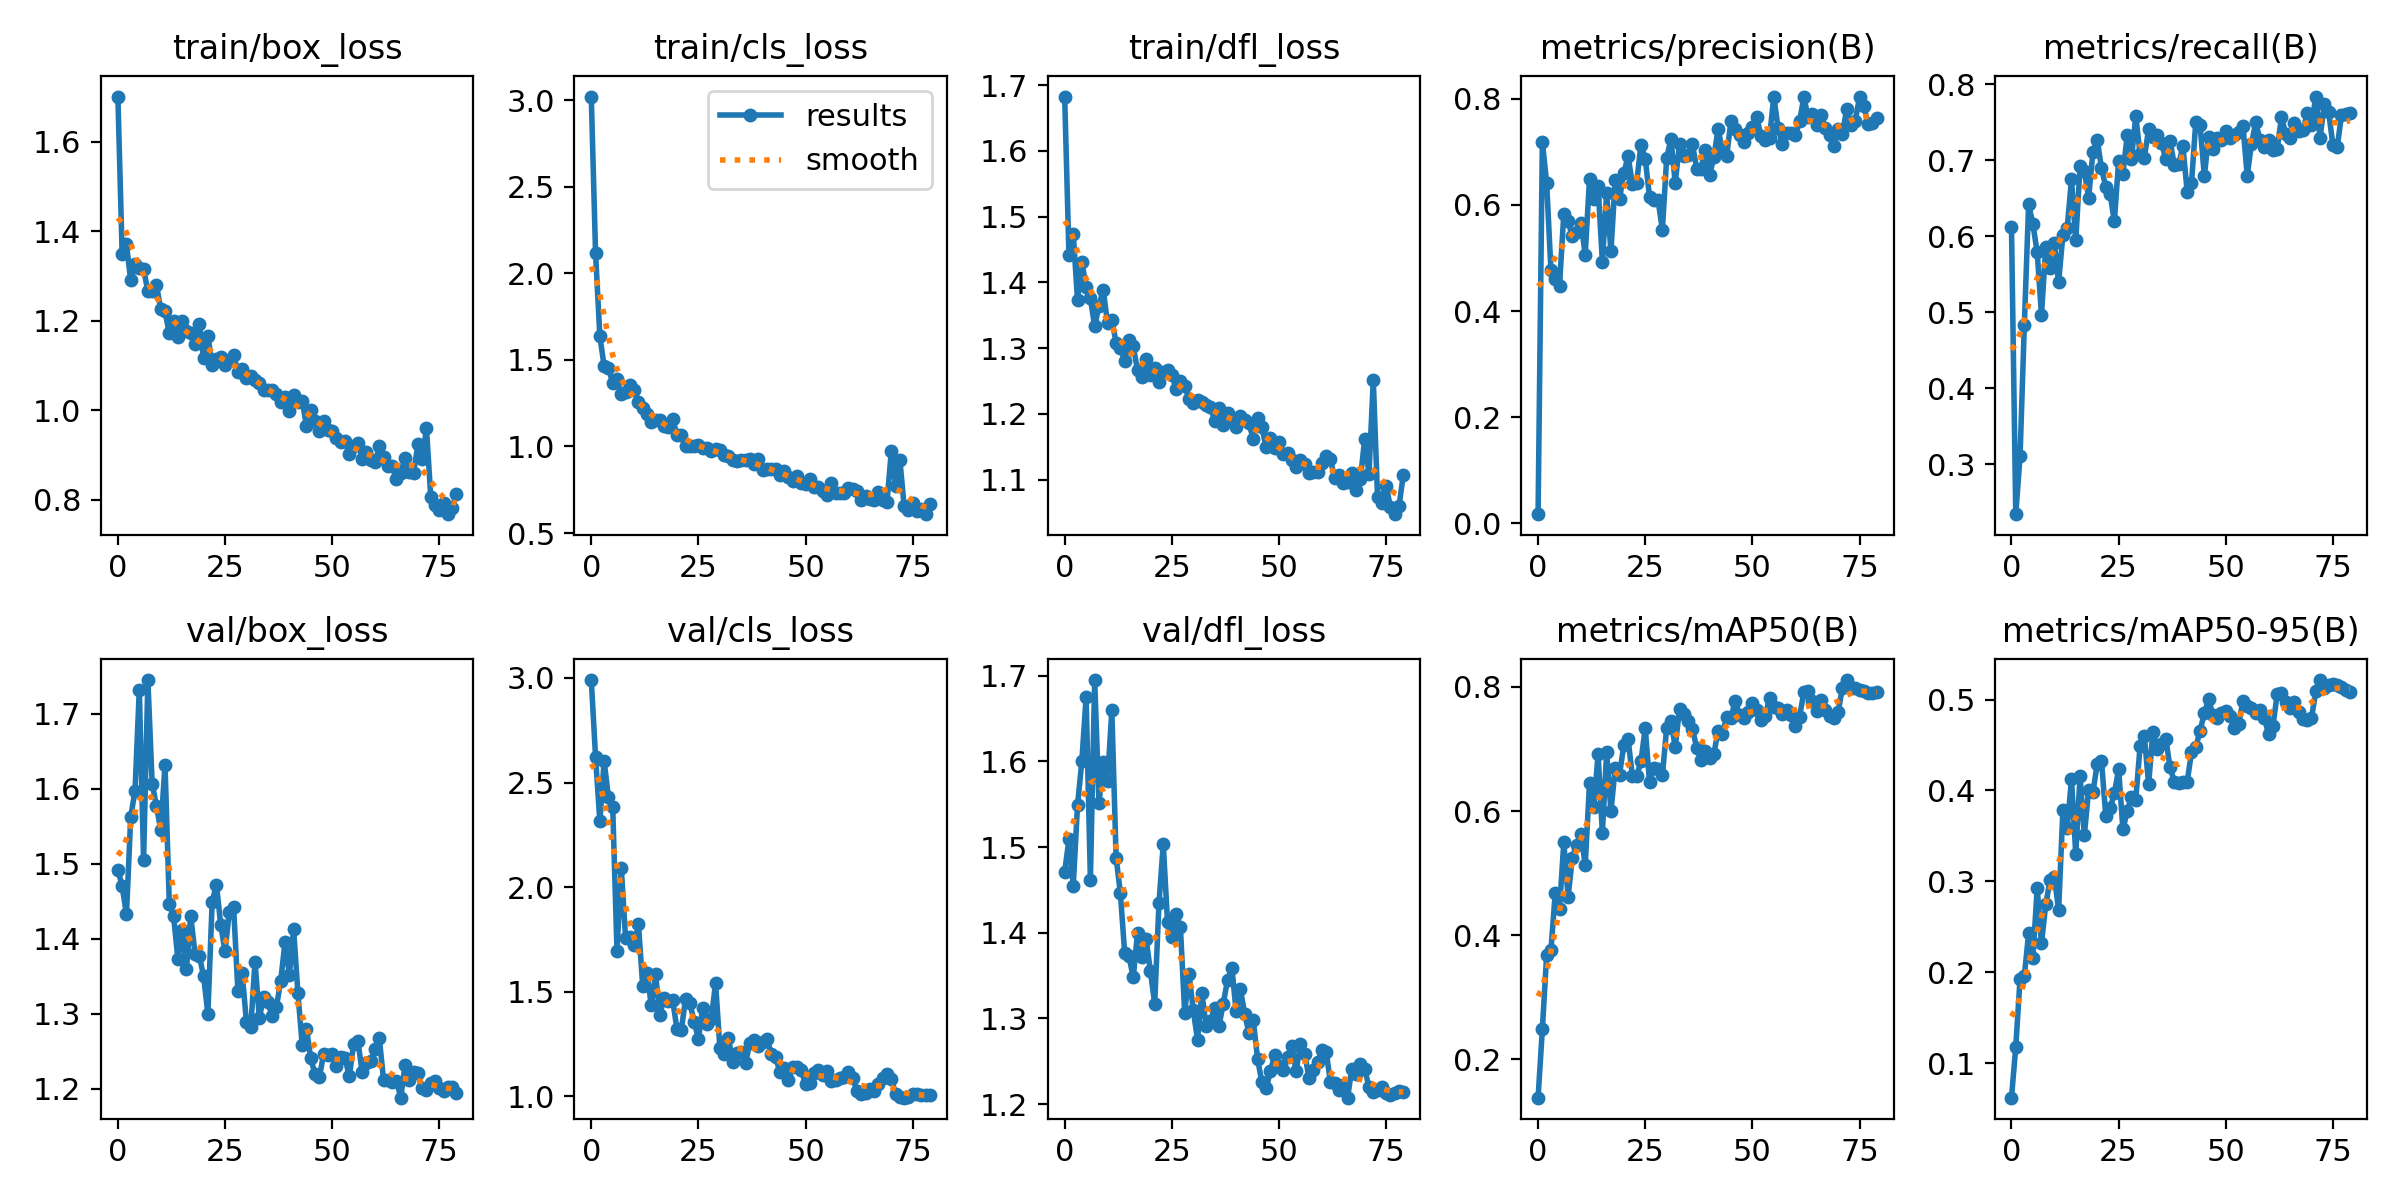

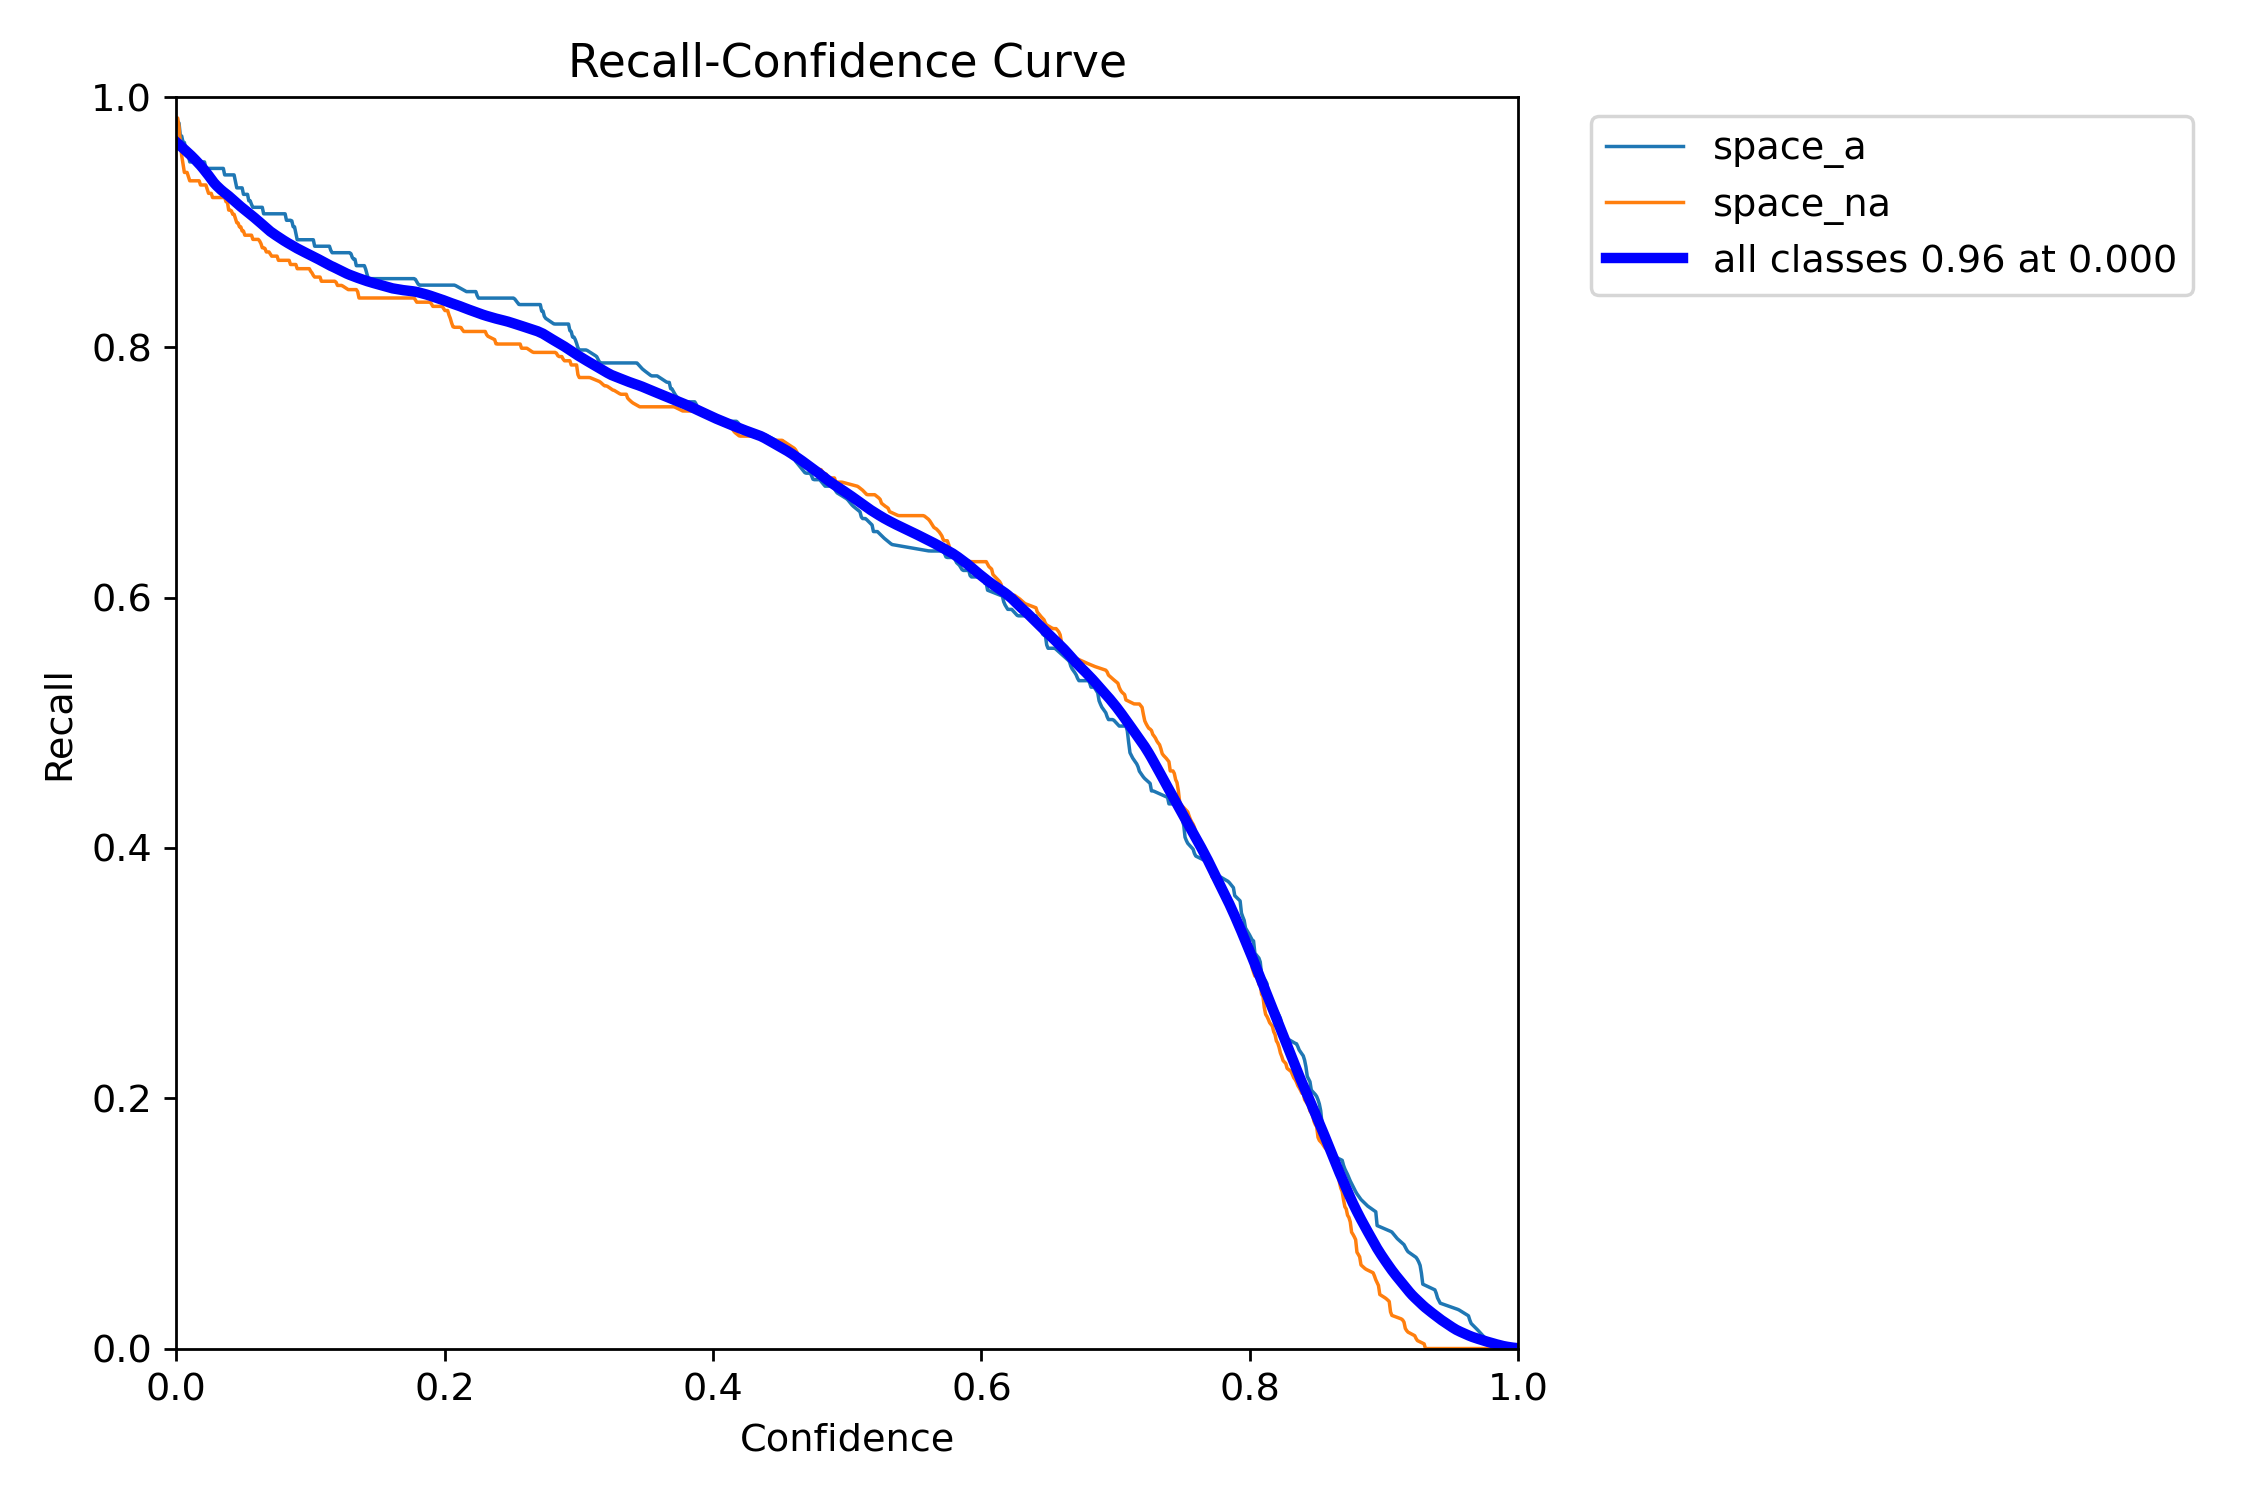

In [1]:
from IPython.display import display, Image
import os
selected_images = [file for file in os.listdir(r"C:\Users\Dell\Desktop\Project B\results_epoch80\graphs") if file.lower().endswith(('.jpg', '.png'))]
for image_file in selected_images:
    image_path = os.path.join(r"C:\Users\Dell\Desktop\Project B\results_epoch80\graphs", image_file)
    display(Image(filename=image_path))

                                                     ****